In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../src/data/data.csv')

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_rows', 200)

In [16]:
df.dtypes
#df.query('Winner == "Draw"').shape[0]/df.query('Winner != "Draw"').shape[0] * 100

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_avg_KD                        float64
B_avg_opp_KD                    float64
B_avg_SIG_STR_pct               float64
B_avg_opp_SIG_STR_pct           float64
B_avg_TD_pct                    float64
B_avg_opp_TD_pct                float64
B_avg_SUB_ATT                   float64
B_avg_opp_SUB_ATT               float64
B_avg_REV                       float64
B_avg_opp_REV                   float64
B_avg_SIG_STR_att               float64
B_avg_SIG_STR_landed            float64
B_avg_opp_SIG_STR_att           float64
B_avg_opp_SIG_STR_landed        float64
B_avg_TOTAL_STR_att             float64
B_avg_TOTAL_STR_landed          float64


In [14]:
df.describe()

,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,R_Str_Def,R_TD_Avg,R_TD_Acc,R_TD_Def,R_Sub_Avg,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,8159.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,...,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8131.000000,7736.000000,8133.000000,7997.000000,8080.000000
mean,3.152225,0.241980,0.177711,0.464359,0.446330,0.279160,0.261597,0.430700,0.369349,0.151303,...,0.542055,1.580166,0.384750,0.608007,0.625778,178.535666,183.111805,167.901635,29.663749,30.070297
std,0.619506,0.367278,0.325307,0.125998,0.127626,0.265207,0.259828,0.678474,0.610745,0.335812,...,0.091838,1.254400,0.183014,0.199304,0.734258,9.047863,10.946921,36.043845,4.034909,4.239606
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,147.320000,115.000000,18.000000,18.000000
25%,3.000000,0.000000,0.000000,0.391250,0.367500,0.024189,0.034687,0.000000,0.000000,0.000000,...,0.510000,0.610000,0.290000,0.500000,0.100000,172.720000,175.260000,145.000000,27.000000,27.000000
50%,3.000000,0.031250,0.000000,0.462090,0.441719,0.228437,0.196250,0.125000,0.062500,0.000000,...,0.550000,1.310000,0.380000,0.630000,0.500000,177.800000,182.880000,170.000000,29.000000,30.000000
75%,3.000000,0.500000,0.250000,0.539082,0.520000,0.475000,0.412500,0.625000,0.500000,0.125000,...,0.600000,2.250000,0.500000,0.740000,0.900000,185.420000,190.500000,185.000000,32.000000,33.000000
max,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,9.000000,7.000000,6.000000,...,0.840000,11.110000,1.000000,1.000000,21.900000,210.820000,213.360000,345.000000,51.000000,47.000000


## Dealing with NaNs

In [69]:
df_viewer = TEST_df2.copy()

df_viewer['R_Reach_cms'].fillna(reach_from_height(df['R_Height_cms']), inplace=True)
df_viewer['B_Reach_cms'].fillna(reach_from_height(df['B_Height_cms']), inplace=True)

for column in df_viewer.columns:
    if df_viewer[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df_viewer[column].isnull().sum()}")
    else:
        print(f"                                Zero NaNs in {column}")
ref_counts = df_viewer['Referee'].value_counts()
threshold  = 20
valid_refs = ref_counts[ref_counts >= threshold].index
mask_named_ref = df_viewer['Referee'].isin(valid_refs)
print(f"number_of_valid_refs = {valid_refs.shape[0]}")

num_named_ref_fights = mask_named_ref.sum()
num_named_ref_fights
total_fights = len(df)
total_fights
proportion_named = num_named_ref_fights / total_fights
proportion_named

C:\Users\lah25\AppData\Local\Temp\ipykernel_29752\2254782120.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_viewer['R_Reach_cms'].fillna(reach_from_height(df['R_Height_cms']), inplace=True)
C:\Users\lah25\AppData\Local\Temp\ipykernel_29752\2254782120.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

                                Zero NaNs in R_fighter
                                Zero NaNs in B_fighter
                                Zero NaNs in date
                                Zero NaNs in location
Nan in Winner: 3
                                Zero NaNs in title_bout
                                Zero NaNs in weight_class
                                Zero NaNs in no_of_rounds
                                Zero NaNs in B_avg_KD
                                Zero NaNs in B_avg_opp_KD
                                Zero NaNs in B_avg_SIG_STR_pct
                                Zero NaNs in B_avg_opp_SIG_STR_pct
                                Zero NaNs in B_avg_TD_pct
                                Zero NaNs in B_avg_opp_TD_pct
                                Zero NaNs in B_avg_SUB_ATT
                                Zero NaNs in B_avg_opp_SUB_ATT
                                Zero NaNs in B_avg_REV
                                Zero NaNs in B_avg_opp_REV

KeyError: 'Referee'

* Looks like the blue fighter stats have 1387 missing rows and the red fighter stats have 704 missing rows, i.e those fighters must not have had any previous fights. We should replace these values with the median.

In [34]:
df2 = df.copy()
raw_referees = df2['Referee'].copy()
'''
    NOTE: The referee info could potentially be useful, i.e. maybe Herb Dean is more likely to stand fighters up than another ref, thereby giving
    a slight advantage to a striker over a grappler. Removed for now just to simplify, and also because of the difficulty in finding out who the ref
    for a specific fight is before it takes place.
'''

'\n    NOTE: The referee info could potentially be useful, i.e. maybe Herb Dean is more likely to stand fighters up than another ref, thereby giving\n    a slight advantage to a striker over a grappler. Removed for now just to simplify, and also because of the difficulty in finding out who the ref\n    for a specific fight is before it takes place.\n'

* Referee doesn't look like an important column. Let's delete that.
* Let's see if height and reach have a correlation
* The rest i.e. Age, Stance and Height, let's fill with the median of that column.

In [35]:
df2.drop(columns=['Referee'], inplace=True)

In [36]:
df2['R_Reach_cms']

0       177.80
1       195.58
2       157.48
3       193.04
4       172.72
         ...  
8154       NaN
8155       NaN
8156       NaN
8157       NaN
8158       NaN
Name: R_Reach_cms, Length: 8159, dtype: float64

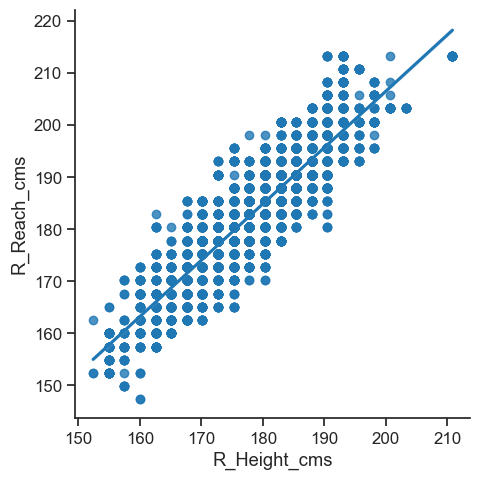

In [42]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(data=df2, # Data source
            x='R_Height_cms', # Horizontal axis
           y='R_Reach_cms', # Vertical axis
           fit_reg=True # fix a regression line
           ) # S marker size
plt.show()

In [48]:
from scipy.stats import linregress
'''
    Here I am working out a relationship between height and reach so I can more accurately determnine one from the other.
'''

# Drop rows with missing values in height/reach
df_clean = df2[['R_Height_cms', 'R_Reach_cms']].dropna()

# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_clean['R_Height_cms'], df_clean['R_Reach_cms'])

# Print regression equation
print(f"Reach = {slope:.2f} × Height + {intercept:.2f}")
print(f"R² = {r_value**2:.3f}")
print(f"A height of 150cms results in a reach of {(slope*150 + intercept).round(2)}")

Reach = 1.08 × Height + -9.91
R² = 0.806
A height of 150cms results in a reach of 152.41


* We can see there is a positive correlation between height and reach. So we'll replace reach with height
* Or at least that's what this bozo did, we can do better by working out the linear relationship and applying.

In [54]:
def reach_from_height(height, slope=slope, intercept=intercept):
    return (height * slope + intercept).round(2)

reach_from_height(150)
df2.select_dtypes(include='number').median()


no_of_rounds                      3.000000
B_avg_KD                          0.031250
B_avg_opp_KD                      0.000000
B_avg_SIG_STR_pct                 0.462090
B_avg_opp_SIG_STR_pct             0.441719
B_avg_TD_pct                      0.228437
B_avg_opp_TD_pct                  0.196250
B_avg_SUB_ATT                     0.125000
B_avg_opp_SUB_ATT                 0.062500
B_avg_REV                         0.000000
B_avg_opp_REV                     0.000000
B_avg_SIG_STR_att                71.687500
B_avg_SIG_STR_landed             32.851562
B_avg_opp_SIG_STR_att            70.000000
B_avg_opp_SIG_STR_landed         30.167908
B_avg_TOTAL_STR_att              94.796875
B_avg_TOTAL_STR_landed           51.000000
B_avg_opp_TOTAL_STR_att          91.500000
B_avg_opp_TOTAL_STR_landed       47.187500
B_avg_TD_att                      2.000000
B_avg_TD_landed                   0.719360
B_avg_opp_TD_att                  2.074219
B_avg_opp_TD_landed               0.718750
B_avg_HEAD_

In [65]:
df2['R_Reach_cms'].fillna(reach_from_height(df2['R_Height_cms']), inplace=True)
df2['B_Reach_cms'].fillna(reach_from_height(df2['B_Height_cms']), inplace=True)

C:\Users\lah25\AppData\Local\Temp\ipykernel_29752\2442021395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['R_Reach_cms'].fillna(reach_from_height(df2['R_Height_cms']), inplace=True)
C:\Users\lah25\AppData\Local\Temp\ipykernel_29752\2442021395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [70]:
# Filter rows with any NaNs
fights_with_nans = df2[df2.isna().any(axis=1)]

# Show the dates of those fights
fights_with_nans['date']

# Making a copy of df2 to play with
TEST_df2 = df2.copy()

columns_with_nans = df2.select_dtypes(include='number').columns[
    df2.select_dtypes(include='number').isna().any()
].tolist()
columns_with_nans


for col in columns_with_nans:
    if col in df2.columns:
        print(f"\nFilling NaNs in column: {col}")
        for weight_class, group in df2.groupby('weight_class'):
            median_value = group[col].median()
            #print(f"  {weight_class}: median = {median_value}")
            df2.loc[group.index, col] = group[col].fillna(median_value)
df2


Filling NaNs in column: B_avg_KD

Filling NaNs in column: B_avg_opp_KD

Filling NaNs in column: B_avg_SIG_STR_pct

Filling NaNs in column: B_avg_opp_SIG_STR_pct

Filling NaNs in column: B_avg_TD_pct

Filling NaNs in column: B_avg_opp_TD_pct

Filling NaNs in column: B_avg_SUB_ATT

Filling NaNs in column: B_avg_opp_SUB_ATT

Filling NaNs in column: B_avg_REV

Filling NaNs in column: B_avg_opp_REV

Filling NaNs in column: B_avg_SIG_STR_att

Filling NaNs in column: B_avg_SIG_STR_landed

Filling NaNs in column: B_avg_opp_SIG_STR_att

Filling NaNs in column: B_avg_opp_SIG_STR_landed

Filling NaNs in column: B_avg_TOTAL_STR_att

Filling NaNs in column: B_avg_TOTAL_STR_landed

Filling NaNs in column: B_avg_opp_TOTAL_STR_att

Filling NaNs in column: B_avg_opp_TOTAL_STR_landed

Filling NaNs in column: B_avg_TD_att

Filling NaNs in column: B_avg_TD_landed

Filling NaNs in column: B_avg_opp_TD_att

Filling NaNs in column: B_avg_opp_TD_landed

Filling NaNs in column: B_avg_HEAD_att

Filling NaNs in

,R_fighter,B_fighter,date,location,Winner,title_bout,weight_class,no_of_rounds,B_avg_KD,B_avg_opp_KD,...,R_Str_Def,R_TD_Avg,R_TD_Acc,R_TD_Def,R_Sub_Avg,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Mateusz Gamrot,Ludovit Klein,2025-05-31,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,0.642578,0.000000,...,0.58,5.25,0.35,0.90,0.1,177.80,177.80,155.0,30.0,34.0
1,Zachary Reese,Dusko Todorovic,2025-05-31,"Las Vegas, Nevada, USA",Red,False,Middleweight,3,0.000000,0.578125,...,0.42,3.50,0.55,0.33,2.1,193.04,195.58,185.0,31.0,31.0
2,Rayanne dos Santos,Alice Ardelean,2025-05-31,"Las Vegas, Nevada, USA",Blue,False,Women's Strawweight,3,0.000000,0.000000,...,0.61,0.33,0.12,0.88,0.0,157.48,157.48,115.0,33.0,29.0
3,Dustin Jacoby,Bruno Lopes,2025-05-31,"Las Vegas, Nevada, USA",Red,False,Light Heavyweight,3,0.000000,0.000000,...,0.57,0.33,0.25,0.62,0.0,190.50,193.04,205.0,32.0,37.0
4,Ketlen Vieira,Macy Chiasson,2025-05-31,"Las Vegas, Nevada, USA",Red,False,Women's Featherweight,3,0.001953,0.125000,...,0.51,1.39,0.44,0.88,0.6,172.72,172.72,135.0,33.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,Orlando Wiet,Robert Lucarelli,1994-03-11,"Denver, Colorado, USA",Red,False,Open Weight,1,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.0,177.80,182.49,170.0,30.0,30.0
8155,Frank Hamaker,Thaddeus Luster,1994-03-11,"Denver, Colorado, USA",Red,False,Open Weight,1,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.0,185.42,190.74,217.0,30.0,30.0
8156,Patrick Smith,Ray Wizard,1994-03-11,"Denver, Colorado, USA",Red,False,Open Weight,1,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.0,187.96,193.49,225.0,30.0,30.0
8157,Scott Morris,Sean Daugherty,1994-03-11,"Denver, Colorado, USA",Red,False,Open Weight,1,0.000000,0.000000,...,0.00,0.00,0.00,0.00,0.0,177.80,182.49,210.0,18.0,30.0


In [11]:
''' I think this is bad, replaced with code above, problem exists in assigning heavyweight heights as total median etc. '''
#df2.fillna(df2.median(), inplace=True)

In [78]:
df2['Winner'].value_counts()

Winner
Red     5180
Blue    2831
Draw     145
Name: count, dtype: int64

In [72]:
df2['R_Stance'].value_counts()

R_Stance
Orthodox       6053
Southpaw       1609
Switch          435
Open Stance      15
Sideways          2
Name: count, dtype: int64

In [74]:
''' Replace unknown stances with Orthodox '''
df2['R_Stance'].fillna('Orthodox', inplace=True)
df2['B_Stance'].fillna('Orthodox', inplace=True)

C:\Users\lah25\AppData\Local\Temp\ipykernel_29752\2621178976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['R_Stance'].fillna('Orthodox', inplace=True)
C:\Users\lah25\AppData\Local\Temp\ipykernel_29752\2621178976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [81]:
for column in df2.columns:
    if df2[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df2[column].isnull().sum()}")
df2[df2.isna().any(axis=1)]

,R_fighter,B_fighter,date,location,Winner,title_bout,weight_class,no_of_rounds,B_avg_KD,B_avg_opp_KD,...,R_Str_Def,R_TD_Avg,R_TD_Acc,R_TD_Def,R_Sub_Avg,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age


In [79]:
'''
    NOTE: These are NaN because of whitespace, to be fixed in future processing, but for now, all R_fighters lost anyways so will just fudge.
'''
df2['Winner'].fillna('Blue', inplace=True)

C:\Users\lah25\AppData\Local\Temp\ipykernel_29752\3265250417.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Winner'].fillna('Blue', inplace=True)


## Removing non essential columns

In [80]:
df2['location'].value_counts()

location
Las Vegas, Nevada, USA                         2767
Abu Dhabi, Abu Dhabi, United Arab Emirates      222
London, England, United Kingdom                 183
Newark, New Jersey, USA                         114
Houston, Texas, USA                             108
Anaheim, California, USA                        107
New York City, New York, USA                     99
Montreal, Quebec, Canada                         93
Atlantic City, New Jersey, USA                   93
Toronto, Ontario, Canada                         86
Boston, Massachusetts, USA                       84
Mexico City, Distrito Federal, Mexico            83
Chicago, Illinois, USA                           81
Sydney, New South Wales, Australia               80
Los Angeles, California, USA                     79
Denver, Colorado, USA                            78
Rio de Janeiro, Rio de Janeiro, Brazil           78
Dallas, Texas, USA                               76
Sao Paulo, Sao Paulo, Brazil                     73
Sto

* Since we don't have home-country of each fighter, location is useless
* Date of the fight is also not essential since we already created age with it
* Draws are incredibly rare and should be removed from the target variable so it becomes a binary classification task
* Fighter names are also to be removed

In [82]:
df2['Winner'].value_counts()

Winner
Red     5180
Blue    2834
Draw     145
Name: count, dtype: int64

In [83]:
'''
    Let's pause here and make a copy before removing columns
'''
df3 = df2.copy()

In [84]:
df3.drop(df2.index[df2['Winner'] == 'Draw'], inplace = True)
df3.drop(columns=['location', 'date', 'R_fighter', 'B_fighter'], inplace=True)

In [85]:
df3.dtypes

Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_avg_KD                        float64
B_avg_opp_KD                    float64
B_avg_SIG_STR_pct               float64
B_avg_opp_SIG_STR_pct           float64
B_avg_TD_pct                    float64
B_avg_opp_TD_pct                float64
B_avg_SUB_ATT                   float64
B_avg_opp_SUB_ATT               float64
B_avg_REV                       float64
B_avg_opp_REV                   float64
B_avg_SIG_STR_att               float64
B_avg_SIG_STR_landed            float64
B_avg_opp_SIG_STR_att           float64
B_avg_opp_SIG_STR_landed        float64
B_avg_TOTAL_STR_att             float64
B_avg_TOTAL_STR_landed          float64
B_avg_opp_TOTAL_STR_att         float64
B_avg_opp_TOTAL_STR_landed      float64
B_avg_TD_att                    float64
B_avg_TD_landed                 float64
B_avg_opp_TD_att                float64


* Weight class and Stance are categories, Winner is out target variable.
* We can one hot encode the categories

In [86]:
df3 = pd.concat([df3, pd.get_dummies(df3[['weight_class', 'B_Stance', 'R_Stance']])], axis=1)
df3.drop(columns=['weight_class', 'B_Stance', 'R_Stance'], inplace=True)

In [87]:
df3

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,3,0.642578,0.000000,0.513730,0.408164,0.721738,0.012266,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,Red,False,3,0.000000,0.578125,0.634453,0.593281,0.052656,0.084375,0.000000,...,False,True,False,False,False,False,False,False,False,True
2,Blue,False,3,0.000000,0.000000,0.475000,0.470000,0.250000,0.000000,0.000000,...,False,True,False,False,False,False,True,False,False,False
3,Red,False,3,0.000000,0.000000,0.470000,0.460000,0.350000,0.000000,0.000000,...,False,True,False,False,False,False,True,False,False,False
4,Red,False,3,0.001953,0.125000,0.486494,0.597637,0.861641,0.135410,0.251953,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,Red,False,1,0.000000,0.000000,0.545625,0.358750,0.356094,0.125000,0.375000,...,False,True,False,False,False,False,False,False,True,False
8155,Red,False,1,0.000000,0.000000,0.545625,0.358750,0.356094,0.125000,0.375000,...,False,True,False,False,False,False,True,False,False,False
8156,Red,False,1,0.000000,0.000000,0.545625,0.358750,0.356094,0.125000,0.375000,...,False,True,False,False,False,False,True,False,False,False
8157,Red,False,1,0.000000,0.000000,0.545625,0.358750,0.356094,0.125000,0.375000,...,False,True,False,False,False,False,True,False,False,False


## Saving the data

In [89]:
df3.to_csv('../src/data/preprocessed_data.csv', index=False)